In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [36]:
#Let's store each dataset in a dictionary
files = ['ed70Full.csv','random1Full.csv','random2Full.csv','random3Full.csv']

dfs = {}

for file in files:
    gephi_csv_path = "/home/gerardo/Downloads/DIgitalMedia/Project/robustness/{}".format(file)
    communities_dataset = pd.read_csv(gephi_csv_path, sep=",")
    filter1 = np.array(["Id","Degree"])  
    selected_data_gephi=communities_dataset.loc[:,filter1]
    adna2=selected_data_gephi.dropna(axis=1)
    dfs[file] = pd.DataFrame(adna2)    
    print(dfs[file].head())

                                        Id  Degree
0                      JudgeDread-BigSeven      76
1               GramParsons-CryOneMoreTime      94
2      HankWilliams-MySweetLoveAin'tAround      91
3          TheKing'sSingers-Can'tBuyMeLove      78
4  CharlieRich-LifeHasItsLittleUpsAndDowns      94
     Id  Degree
0  1167      90
1  1174      86
2  1175      91
3  1178      90
4  1187      90
     Id  Degree
0  1556      85
1  1558      91
2  1561      93
3  1566      82
4  1571      87
     Id  Degree
0  1945      76
1  1953      85
2  1957      83
3  1965      85
4  1972      91


In [40]:
#check the number of columns for each dataframe
for file in files:
    print(dfs[file].shape)

(389, 2)
(389, 2)
(389, 2)
(389, 2)


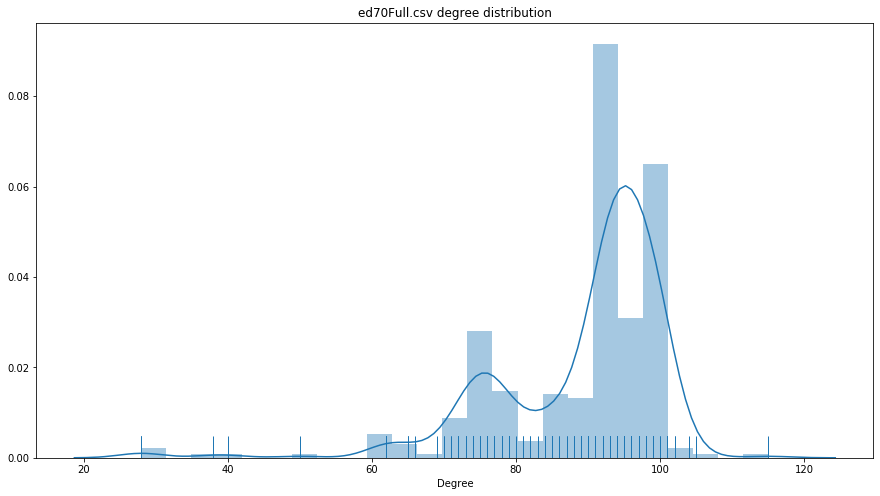

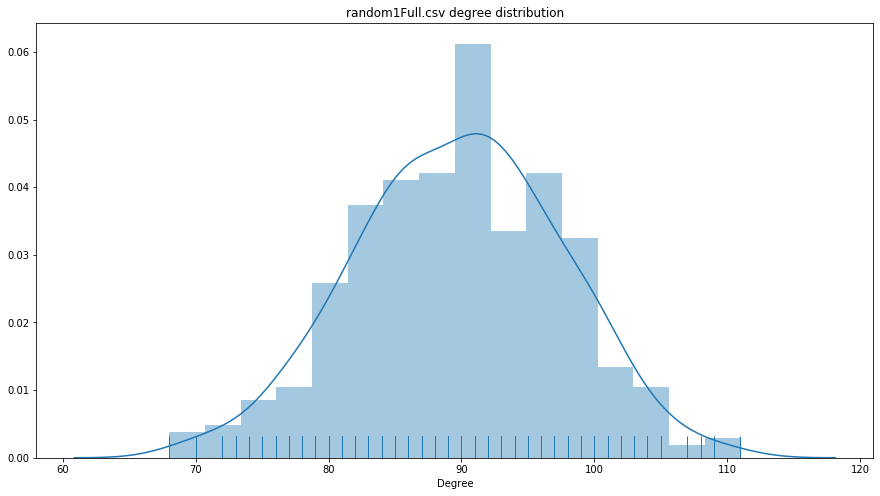

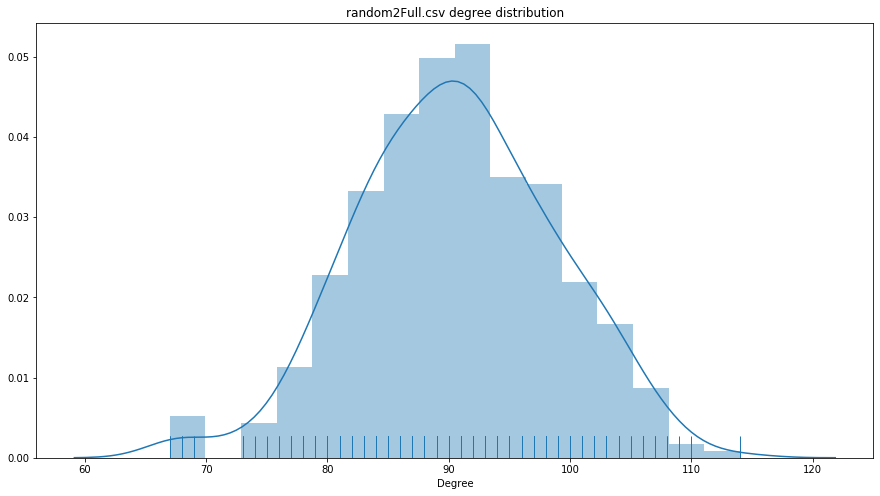

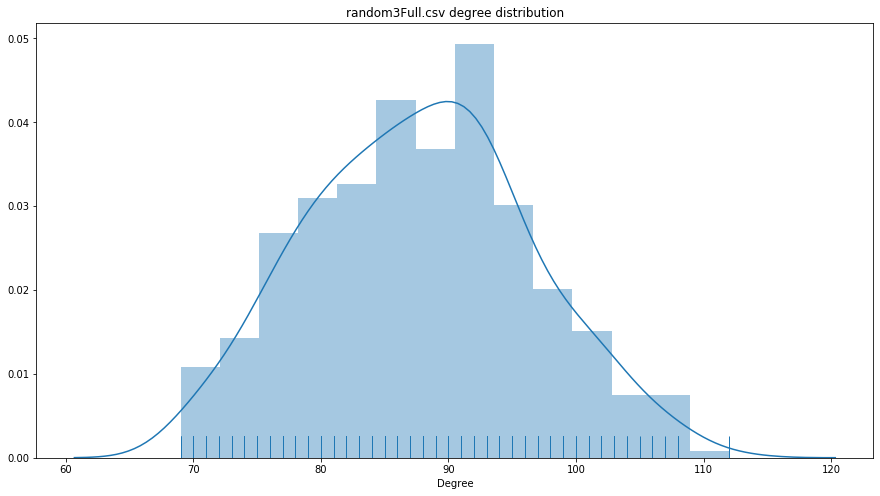

<Figure size 1080x576 with 0 Axes>

In [50]:
#plot the degree distribution for each dataframe
import seaborn as sns
mpl.rcParams['figure.figsize'] = (15, 8)
mpl.rcParams['axes.grid'] = False

for key,value in dfs.items():
#     plt.suptitle("{}".format(str(key).upper()))
    plt.title("{} degree distribution".format(key))
    sns.distplot(value['Degree'], hist=True, rug=True)
    fig = plt.figure()

In [58]:
x1 = [0,.2,.4,.6,.8,1]

robustness_dict = {}
robustness_dict["ED70%"] = [[1,.7609,.2237,.154,.128,0],[1,.6492,.347,.004,.003,0]]
robustness_dict["Random1"] = [[1,.9589,.6787,.2442,.283,0],[1,.9055,.4188,.466,.004,0]]
robustness_dict["Random2"] = [[1,.9666,.7532,.3522,.0617,0],[1,.9218,.5246,.1004,.003,0]]
robustness_dict["Random3"] = [[1,.9666,.7892,.4087,.1028,0],[1,.9201,.5776,.1357,.0071,0]]

In [55]:
for key,value in robustness_dict.items():
    print(value[0])

[1, 0.6492, 0.347, 0.004, 0.003, 0]


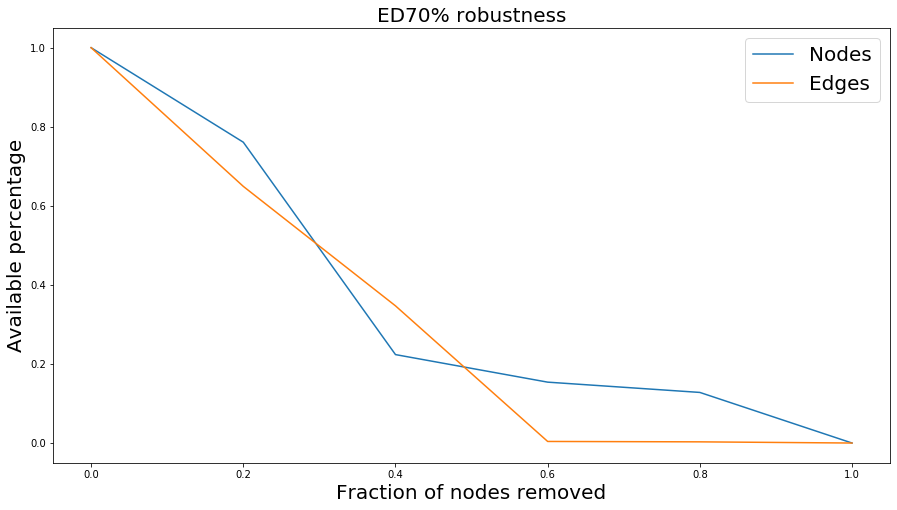

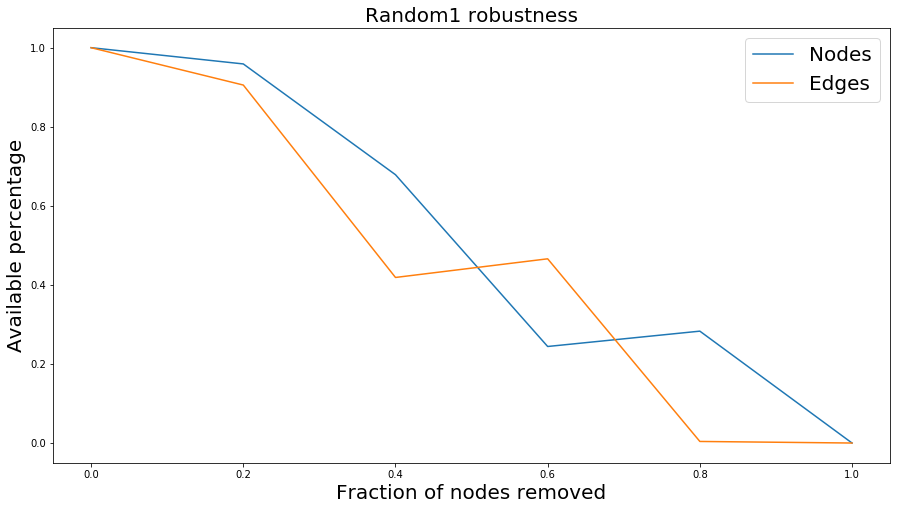

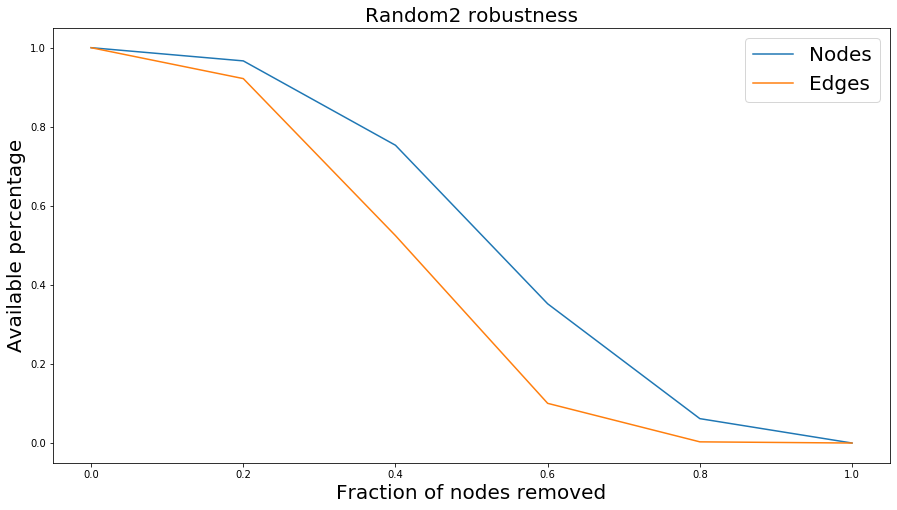

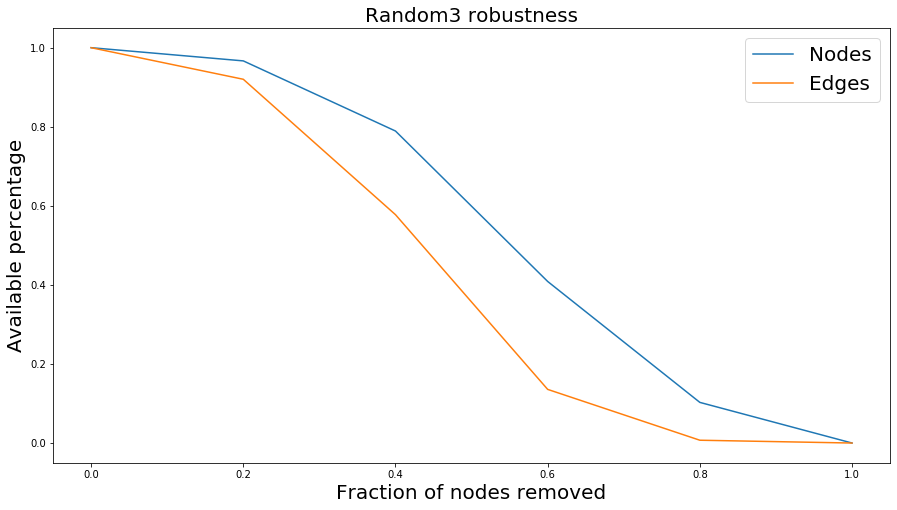

<Figure size 1080x576 with 0 Axes>

In [61]:
for key,value in robustness_dict.items():
    plt.xlabel('Fraction of nodes removed',fontsize=20)
    plt.ylabel('Available percentage',fontsize=20)
    plt.title("{} robustness".format(key),fontsize=20)
    plt.plot(x1,value[0],label="Nodes")
    plt.plot(x1,value[1],label="Edges")
    plt.legend(loc='upper right',fontsize=20)
    plt.figure()